# Latihan latice

In [1]:
import openmc
%matplotlib inline

In [ ]:
Uranium = openmc.Material(name="Uranium")
Uranium.add_nuclide("H1", 6.221E-2)
Uranium.add_nuclide("O16", 3.3621E-2)
Uranium.add_nuclide("F19", 2.5161E-3)
Uranium.add_nuclide("U235", 1.1760E-3)
Uranium.add_nuclide("U238", 8.2051E-5)
Uranium.add_s_alpha_beta("c_H_in_H2O")

Aluminium = openmc.Material(name="Aluminium")
Aluminium.add_element("Al", 1)
Aluminium.set_density("g/cc", 2.7)

Air = openmc.Material(name="Air")
Air.add_element("H", 2)
Air.add_element("O", 1)
Air.set_density('g/cc', 1.0)
Air.add_s_alpha_beta("c_H_in_H2O")


materials = openmc.Materials([Uranium, Aluminium, Air])
materials.export_to_xml()

material_colors = {Uranium : 'red', Aluminium : 'black', Air : 'blue'}

In [52]:
#Bahan bakar
panjang_uranium = 70.2
panjang_al = 80
Uranium_Silinder = openmc.ZCylinder(r=6.35)
Aluminium_Silinder = openmc.ZCylinder(r=6.50)
t_U = openmc.ZPlane(z0=panjang_uranium/2)
b_U = openmc.ZPlane(z0=-panjang_uranium/2)
t_Al = openmc.ZPlane(z0=panjang_al/2, boundary_type='vacuum')
b_Al = openmc.ZPlane(z0=-panjang_al/2)

#Kubus
panjang = 60
lebar = 53
tinggi = 100
kiri = openmc.XPlane(x0=-panjang/2, boundary_type='vacuum')
kanan = openmc.XPlane(x0=panjang/2, boundary_type='vacuum')
depan = openmc.YPlane(y0=-lebar/2, boundary_type='vacuum')
belakang = openmc.YPlane(y0=lebar/2, boundary_type='vacuum')
bawah = openmc.ZPlane(z0=panjang_al/2-tinggi, boundary_type='vacuum')

kubus = +kiri & -kanan & +depan & -belakang & +bawah & -t_Al

# Region bahan bakar dan Clad
Fuel = -Uranium_Silinder & +b_U & -t_U
Clad = +Uranium_Silinder & -Aluminium_Silinder & +b_Al & -t_Al | -Uranium_Silinder & +b_Al & -b_U
void = -Uranium_Silinder & +t_U & -t_Al 
SurroundingWater = +Aluminium_Silinder | -b_Al | +t_Al

# Cell bahan bakar dan clad
Uranium_cell = openmc.Cell(fill=Uranium, region=Fuel)
Al_cell = openmc.Cell(fill=Aluminium, region=Clad)
Void_cell = openmc.Cell(region=void)
SurroundingWater_cell = openmc.Cell(fill=Air, region=SurroundingWater)

uranium_universe = openmc.Universe(cells=[Uranium_cell, Al_cell, Void_cell, SurroundingWater_cell])

# Air di luar bahan bakar
Air_cell = openmc.Cell(fill=Air)
Air_universe = openmc.Universe(cells=[Air_cell])

# Lattice untuk 2 silinder bahan bakar
lattice = openmc.RectLattice()
lattice.lower_left = (-20, -10) #-panjang/2, -lebar/2
lattice.pitch = (15.0, 20.0)
lattice.universes = [[uranium_universe, uranium_universe]] #, [uranium_universe]
lattice.outer = Air_universe

Kubus_cell = openmc.Cell(fill=lattice, region=kubus)
kubus_universe = openmc.Universe(cells=[Kubus_cell])

geom = openmc.Geometry(kubus_universe)
geom.export_to_xml()

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

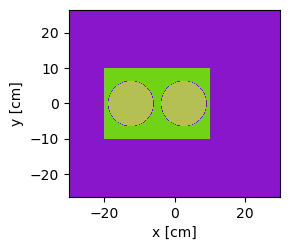

In [57]:
Kubus_cell.plot(basis='xy')

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

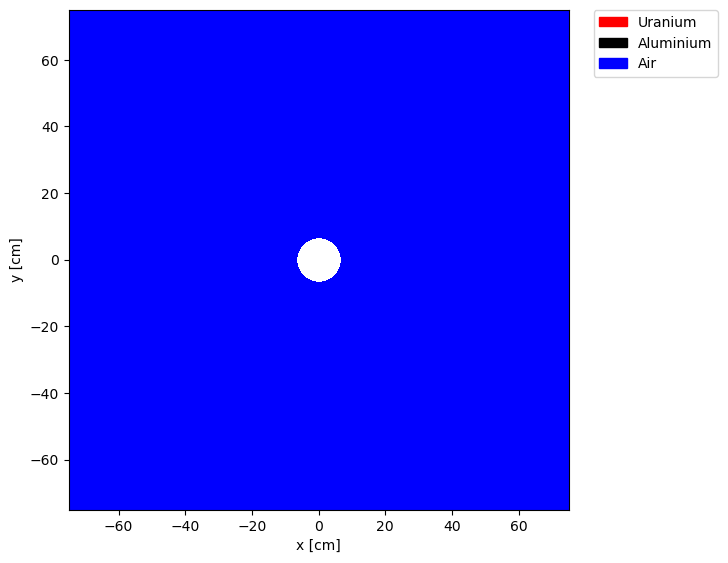

In [54]:
SurroundingWater_cell.plot(basis='xy', width=(150,150), origin=(0,0,0), pixels=(500,500), color_by="material", colors=material_colors, legend=True)

<Axes: xlabel='x [cm]', ylabel='z [cm]'>

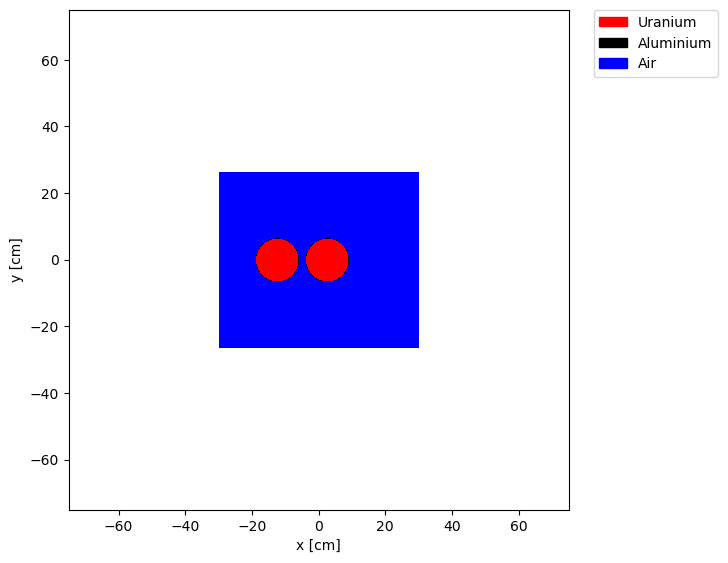

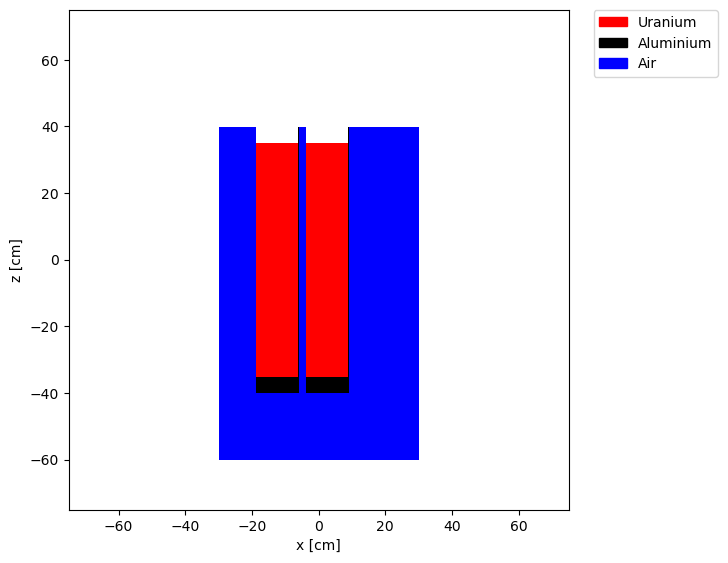

In [53]:
geom.plot(basis='xy', width=(150,150), origin=(0,0,0), pixels=(500,500), color_by="material", colors=material_colors, legend=True)
geom.plot(basis='xz', width=(150,150), origin=(0,0,0), pixels=(500,500), color_by='material', colors=material_colors, legend=True)

In [48]:
# Pengaturan simulasi
import openmc.stats

settings = openmc.Settings()
settings.particles = 5000         # Jumlah neutron per generasi
settings.inactive = 50            # Generasi yang diabaikan
settings.batches = 250            # Total generasi

# Posisi sumber neutron
source = openmc.IndependentSource()
source.space = openmc.stats.Point((0, 0, 35)) 
source2 = openmc.IndependentSource()
source2.space =  openmc.stats.Point((17, 0, 35)) 
settings.source = [source, source2]

settings.export_to_xml()

In [49]:
# Run
openmc.run() #geometry_debug=True

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################